In [67]:
#importar libreías necesarias

import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.models import Sequential

In [57]:
# Define the ticker symbol
ticker_symbol = 'ETH-USD'

# Get data on this ticker
ticker_data = yf.Ticker(ticker_symbol)

# Get the historical prices for this ticker
data = ticker_data.history(period='1d', start='2016-01-01', end='2024-01-01')

# Display the DataFrame
print(data.head())

# Prepare Data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

prediction_days = 60
x_train, y_train = [], []

for x in range(prediction_days, len(scaled_data)):
    x_train.append(scaled_data[x-prediction_days:x, 0])
    y_train.append(scaled_data[x, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create the neural network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compiling and fitting the LSTM model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=25, batch_size=32)

# Testing the Model
test_start = dt.datetime(2022, 6, 6)
test_end = dt.datetime(2024, 1, 1)

# Fetching the test data
test_data = yf.download('ETH-USD', start=test_start, end=test_end)
actual_prices = test_data['Close'].values

# Combining the datasets
total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1, 1)
model_inputs = scaler.transform(model_inputs)

x_test = []

for x in range(prediction_days, len(model_inputs)):
    x_test.append(model_inputs[x-prediction_days:x, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

prediction_prices = model.predict(x_test)
prediction_prices = scaler.inverse_transform(prediction_prices)


                                 Open        High         Low       Close  \
Date                                                                        
2017-11-09 00:00:00+00:00  308.644989  329.451996  307.056000  320.884003   
2017-11-10 00:00:00+00:00  320.670990  324.717987  294.541992  299.252991   
2017-11-11 00:00:00+00:00  298.585999  319.453003  298.191986  314.681000   
2017-11-12 00:00:00+00:00  314.690002  319.153015  298.513000  307.907990   
2017-11-13 00:00:00+00:00  307.024994  328.415009  307.024994  316.716003   

                               Volume  Dividends  Stock Splits  
Date                                                            
2017-11-09 00:00:00+00:00   893249984        0.0           0.0  
2017-11-10 00:00:00+00:00   885985984        0.0           0.0  
2017-11-11 00:00:00+00:00   842300992        0.0           0.0  
2017-11-12 00:00:00+00:00  1613479936        0.0           0.0  
2017-11-13 00:00:00+00:00  1041889984        0.0           0.0  
Epoch

/Users/fer/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


69/69 ━━━━━━━━━━━━━━━━━━━━ 10s 73ms/step - loss: 0.0284
Epoch 2/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0034
Epoch 3/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 72ms/step - loss: 0.0026
Epoch 4/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0025
Epoch 5/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0026
Epoch 6/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 73ms/step - loss: 0.0028
Epoch 7/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0025
Epoch 8/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 77ms/step - loss: 0.0023
Epoch 9/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 74ms/step - loss: 0.0020
Epoch 10/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0017
Epoch 11/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 76ms/step - loss: 0.0018
Epoch 12/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 0.0018
Epoch 13/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 86ms/step - loss: 0.0015
Epoch 14/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0017
Epoch 15/25
69/69 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - loss: 0.0015
Epoch 16/25
69

[*********************100%%**********************]  1 of 1 completed


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step


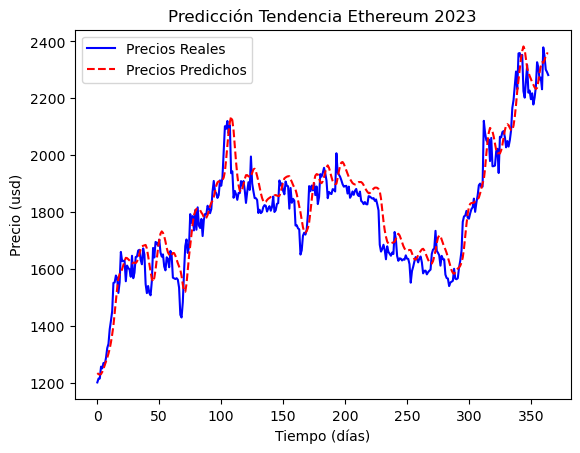

In [68]:
plt.plot(actual_prices[-365:], color='blue', label='Precios Reales')  # Últimos 365 días de precios reales
plt.plot(prediction_prices[-365:], 'r--', label='Precios Predichos')  # Últimos 365 días de precios predichos
plt.title('Predicción Tendencia Ethereum 2023')
plt.xlabel('Tiempo (días)')
plt.ylabel('Precio (usd)')
plt.legend(loc='upper left')
plt.show()

In [66]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Calcular el Error Absoluto Medio (MAE)
mae = mean_absolute_error(actual_prices[-365:], prediction_prices[-365:])
print('Error Absoluto Medio:', mae)


# Calcular el Error Cuadrático Medio (MSE)
#mse = mean_squared_error(actual_prices[-365:], prediction_prices[-365:])
#print('Error Cuadrático Medio:', mse)

# Calcular Raíz del Error Cuadrático Medio (RMSE)
#rmse = np.sqrt(mse)
#print('Raíz del Error Cuadrático Medio :', rmse)

# Calcular el Error Porcentual Absoluto Medio (MAPE)
mape = np.mean(np.abs((actual_prices[-365:] - prediction_prices[-365:]) / actual_prices[-365:])) * 100
print('Error Porcentual Absoluto Medio:', mape)

# Precisión Direccional
directional_accuracy = np.mean(
    np.sign(actual_prices[1:-135] - actual_prices[135:-1]) == np.sign(prediction_prices[1:-135] - prediction_prices[135:-1])
) * 100
print('Precisión Direccional:', directional_accuracy, '%')


Error Absoluto Medio: 54.22602137735445
Error Porcentual Absoluto Medio: 13.769222709941896
Precisión Direccional: 55.03325618731887 %
